### 웹 크롤링
- robots.txt : https://www.ted.com/robots.txt
        
User-agent: *  >> 클라이언트
Disallow: /latest
Disallow: /latest-talk
Disallow: /latest-playlist
Disallow: /people
Disallow: /profiles
Disallow: /conversations
Disallow: /themes/rss
Disallow: /discussions
Disallow: /tpv4

User-agent: Baiduspider >> 이 경로 데이터 가지가지마!
Disallow: /search
Disallow: /latest
Disallow: /latest-talk
Disallow: /latest-playlist
Disallow: /people
Disallow: /profiles
Disallow: /discussions
Disallow: /tpv4

- 아직 크롤링에 관련된 법 X
- 크롤링이 문제가 되는 경우
    - 지적재산권 침해
    - 시스템 과부화 (디도스공격)
    - 데이터 사용표준    
- requests : json >> dict
- requests : html >> bs >> df
- selenium : web browser >> 브라우져 띄어서 selenium으로 컨트롤

### 웹 크롤링 절차
- URL 알아내기 : 크롬 브라우져의 개발자도구 활용
- reqeust(url) > response(JSON)
- json > DataFrame (데이터 형태를 바꿈 : 파싱)

In [110]:
import requests
import pandas as pd

In [ ]:
# 네이버 증권 사이트에서 코스피, 코스닥, 원달러환율 데이터 수집

In [ ]:
# 1. URL 알아내기 : 개발자도구 : URL

In [47]:
page_size, page = 10, 1
url = f"https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}"  #f추가 format # headers url 복붙
print(url)

https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1


In [48]:
# 2. request(URL) > response : JSON(str)

In [49]:
response = requests.get(url)
response

<Response [200]>

In [50]:
response.text

'[{"localTradedAt":"2021-11-03","closePrice":"2,975.71","compareToPreviousClosePrice":"-37.78","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-1.25","openPrice":"3,020.36","highPrice":"3,020.87","lowPrice":"2,969.01"},{"localTradedAt":"2021-11-02","closePrice":"3,013.49","compareToPreviousClosePrice":"34.55","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.16","openPrice":"2,995.58","highPrice":"3,034.30","lowPrice":"2,995.58"},{"localTradedAt":"2021-11-01","closePrice":"2,978.94","compareToPreviousClosePrice":"8.26","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"0.28","openPrice":"2,984.18","highPrice":"2,991.81","lowPrice":"2,976.87"},{"localTradedAt":"2021-10-29","closePrice":"2,970.68","compareToPreviousClosePrice":"-38.87","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-1.29","openPrice":"3,025.67","highPrice":"3,030.17",

In [51]:
# 3. JSON(str) > dict, list > DataFrame

In [52]:
data1 = response.json()
type(data1)

list

In [53]:
df = pd.DataFrame(data1)[['localTradedAt', 'closePrice']]
df.tail()

,localTradedAt,closePrice
5,2021-10-27,"3,025.49"
6,2021-10-26,"3,049.08"
7,2021-10-25,"3,020.54"
8,2021-10-22,"3,006.16"
9,2021-10-21,"3,007.33"


In [88]:
# 4. 함수로 만들기
def crawling_index(code="KOSPI",page_size=20, page=1):
    url = f"https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}"
    response = requests.get(url)
    return pd.DataFrame(response.json())[['localTradedAt', 'closePrice']]        

In [115]:
kospi = crawling_index()
kospi.tail()

,localTradedAt,closePrice
15,2021-10-13,"2,944.41"
16,2021-10-12,"2,916.38"
17,2021-10-08,"2,956.30"
18,2021-10-07,"2,959.46"
19,2021-10-06,"2,908.31"


In [116]:
kosdaq = crawling_index("KOSDAQ")
kosdaq.tail()

,localTradedAt,closePrice
15,2021-10-13,953.47
16,2021-10-12,940.15
17,2021-10-08,953.11
18,2021-10-07,953.43
19,2021-10-06,922.36


In [ ]:
# 5. 원달러환율 데이터 수집하기

In [117]:
def crawling_index2(page_size2=20, page2=1):
    url2 = f"https://api.stock.naver.com/marketindex/exchange/FX_USDKRW/prices?page={page2}&pageSize={page_size2}"
    response2 = requests.get(url2)
    return pd.DataFrame(response2.json())[['localTradedAt', 'closePrice']]    

In [118]:
exchange_rate = crawling_index2()
exchange_rate.tail()

,localTradedAt,closePrice
15,2021-10-13,"1,192.50"
16,2021-10-12,"1,196.50"
17,2021-10-08,"1,196.00"
18,2021-10-07,"1,190.50"
19,2021-10-06,"1,196.50"


In [ ]:
# 그래프 그리기

In [93]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [96]:
import matplotlib.pyplot as plt

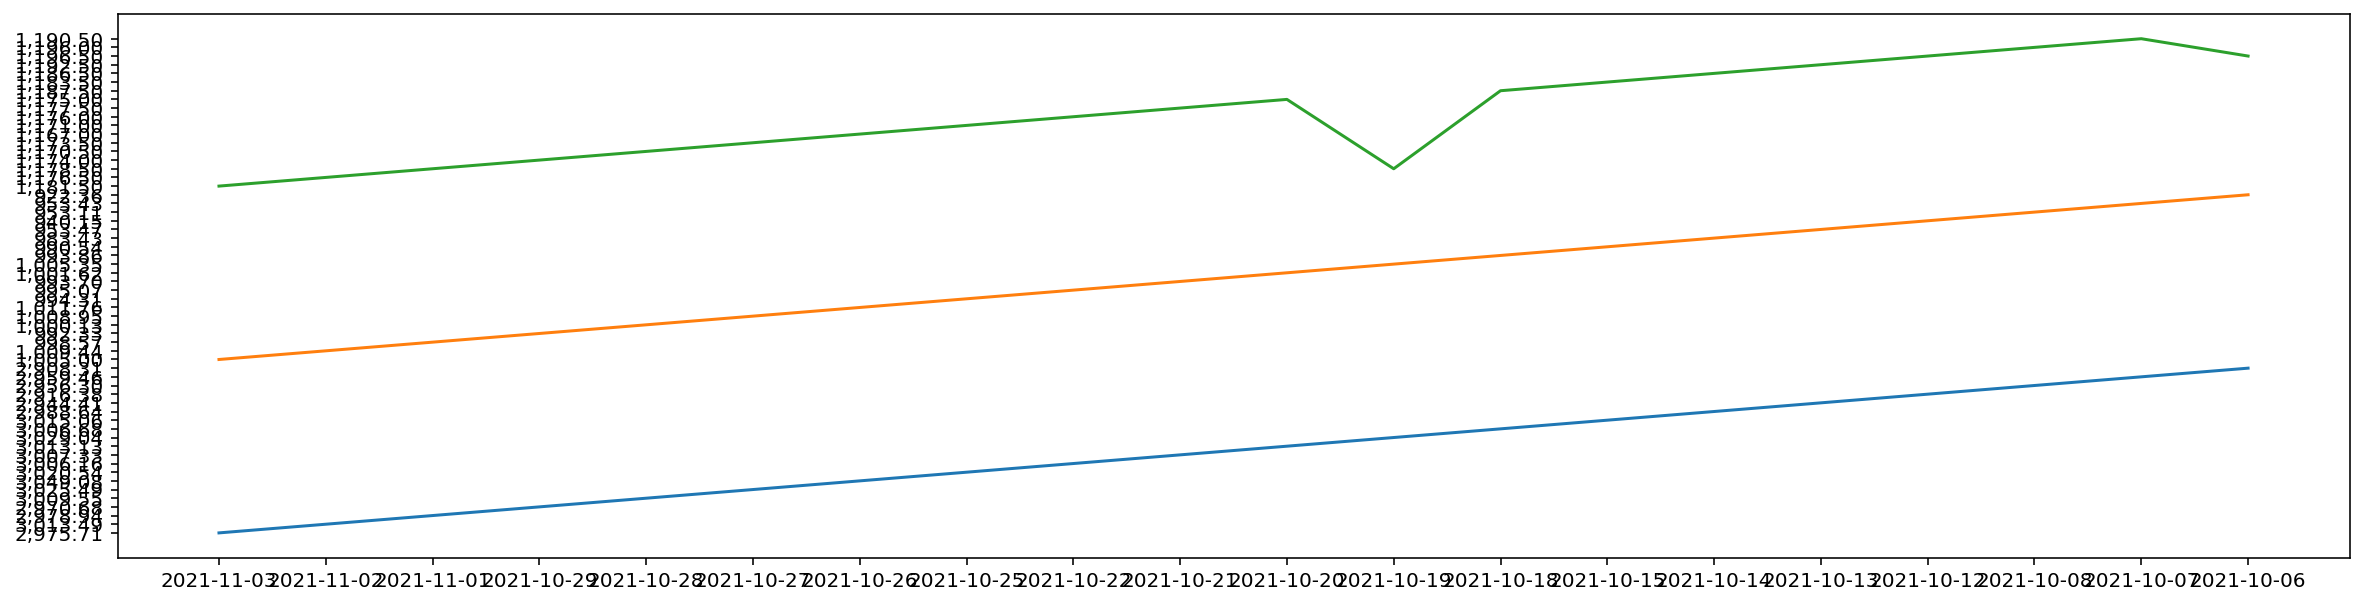

In [99]:
plt.figure(figsize=(20,5))
plt.plot(kospi['localTradedAt'],kospi['closePrice'])
plt.plot(kosdaq['localTradedAt'],kosdaq['closePrice'])
plt.plot(exchange_rate['localTradedAt'],exchange_rate['closePrice'])
plt.show()

In [119]:
kospi["closePrice"] = kospi["closePrice"].apply(
    lambda data: data.replace(",", "")).astype("float")

kosdaq["closePrice"] = kosdaq["closePrice"].apply(
    lambda data: data.replace(",", "")).astype("float")

exchange_rate["closePrice"] = exchange_rate["closePrice"].apply(
    lambda data: data.replace(",", "")).astype("float")

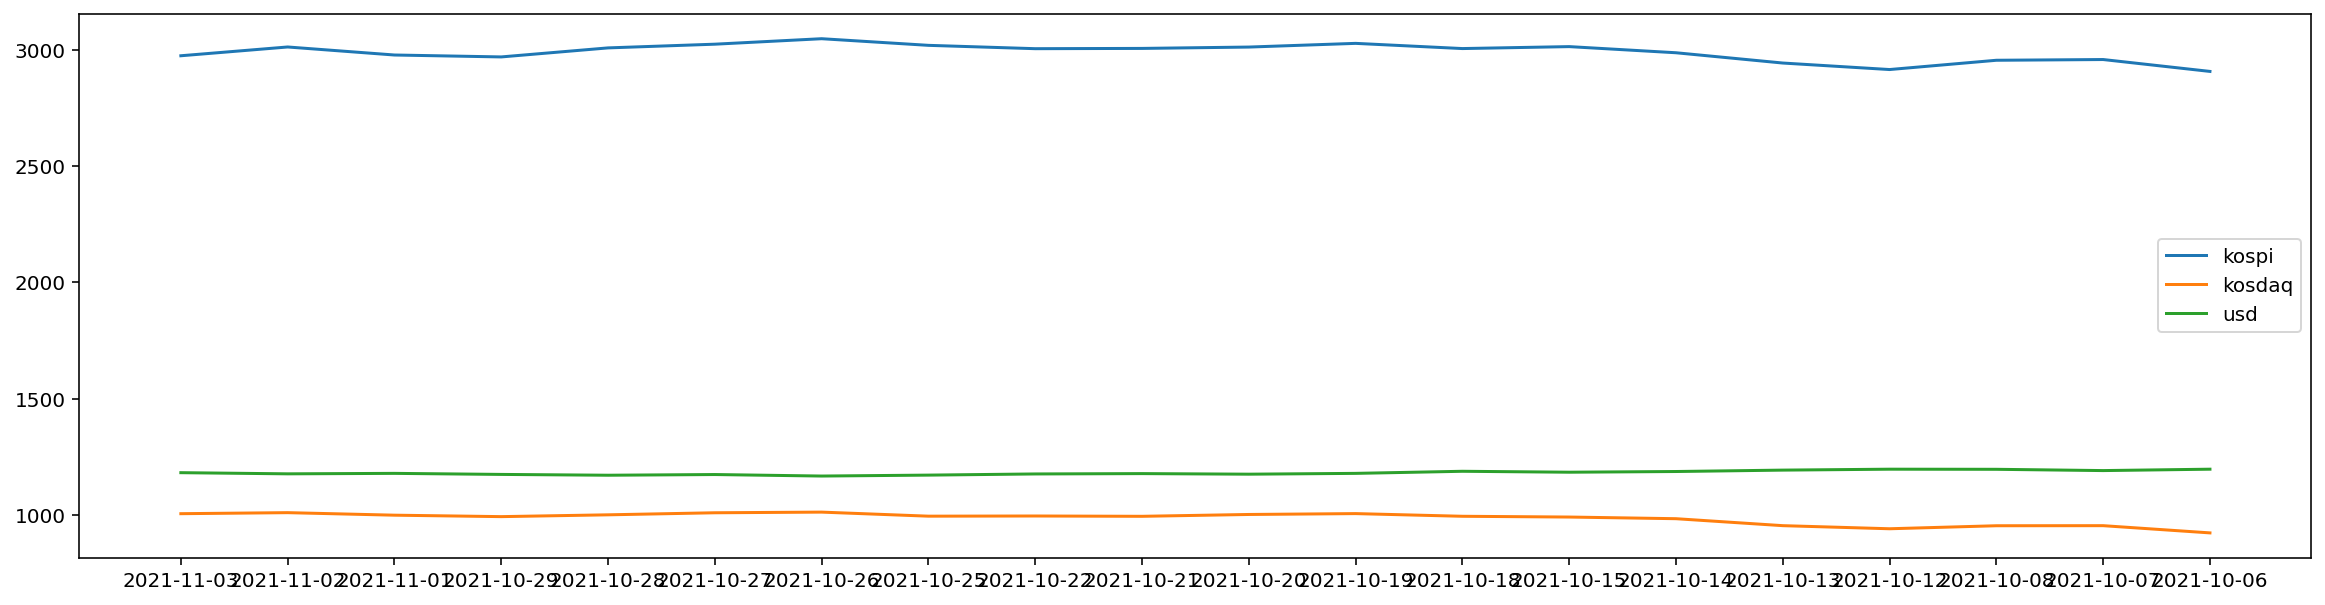

In [123]:
plt.figure(figsize=(20,5))
plt.plot(kospi['localTradedAt'],kospi['closePrice'], label='kospi')
plt.plot(kosdaq['localTradedAt'],kosdaq['closePrice'], label='kosdaq')
plt.plot(exchange_rate['localTradedAt'],exchange_rate['closePrice'], label='usd')
plt.legend()
plt.show()

In [125]:
from sklearn.preprocessing import minmax_scale 

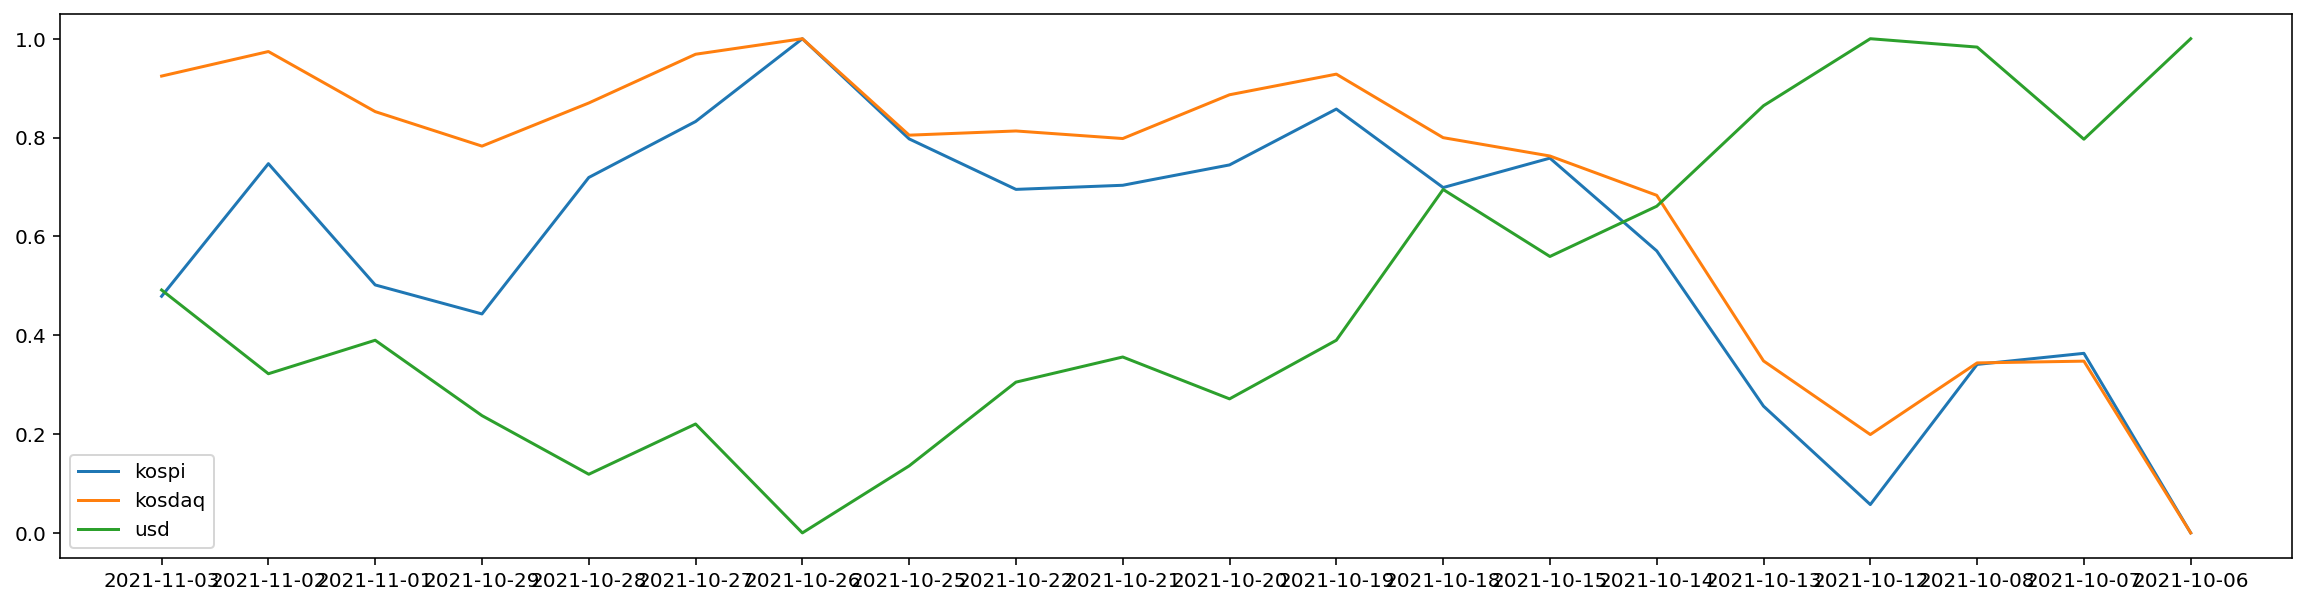

In [126]:
plt.figure(figsize=(20,5))
plt.plot(kospi['localTradedAt'],minmax_scale (kospi['closePrice']), label='kospi')
plt.plot(kosdaq['localTradedAt'],minmax_scale (kosdaq['closePrice']), label='kosdaq')
plt.plot(exchange_rate['localTradedAt'],minmax_scale (exchange_rate['closePrice']), label='usd')
plt.legend()
plt.show()

In [ ]:
# 상관계수 분석
# 1에 가까울수록 강한 양의 상관관계
# -1에 가까울수록 강한 음의 상관관계
# 0에 가까울수록 관계가 없음

In [131]:
df3 = kospi.copy()
df3['kosdaq'] = kosdaq['closePrice']
df3['usd'] = exchange_rate['closePrice']
df3 = df3.rename(columns={'closePrice': 'kospi'})
df3 = df3.drop(columns=['localTradedAt'])
df3.tail(2)

,kospi,kosdaq,usd
18,2959.46,953.43,1190.5
19,2908.31,922.36,1196.5


In [132]:
df3.corr()

,kospi,kosdaq,usd
kospi,1.000000,0.897559,-0.829141
kosdaq,0.897559,1.000000,-0.873039
usd,-0.829141,-0.873039,1.000000
